<a href="https://colab.research.google.com/github/koushikroy/TimeSeriesForecastingProphet/blob/main/Facebook%20Prophet%20stock%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings; 
warnings.simplefilter('ignore')

# 0. Install and Import Dependencies

In [2]:
!pip install pystan
!pip install fbprophet

In [3]:
import pandas as pd
from fbprophet import Prophet

# 1. Read in Data and Process Dates

In [4]:
!wget https://raw.githubusercontent.com/koushikroy/TimeSeriesForecastingProphet/main/dataset.csv

--2021-07-24 09:22:25--  https://raw.githubusercontent.com/koushikroy/TimeSeriesForecastingProphet/main/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43354 (42K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]  42.34K  --.-KB/s    in 0.002s  

2021-07-24 09:22:25 (27.3 MB/s) - ‘dataset.csv’ saved [43354/43354]



In [5]:
df = pd.read_csv('dataset.csv')

In [6]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [7]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [8]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


# 2. Train Model

In [9]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

# 3. Forecast Away

In [10]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.650969,848.488602,4060.020554,3041.650969,3041.650969,-640.901196,-640.901196,-640.901196,468.456246,468.456246,468.456246,16.659618,16.659618,16.659618,-1126.017060,-1126.017060,-1126.017060,0.0,0.0,0.0,2400.749773
1,2018-01-02,3042.411286,735.776567,3975.670416,3042.411286,3042.411286,-651.011594,-651.011594,-651.011594,468.456246,468.456246,468.456246,-11.261861,-11.261861,-11.261861,-1108.205979,-1108.205979,-1108.205979,0.0,0.0,0.0,2391.399692
2,2018-01-03,3043.171603,771.226161,3915.831209,3043.171603,3043.171603,-625.159988,-625.159988,-625.159988,468.456246,468.456246,468.456246,-4.408938,-4.408938,-4.408938,-1089.207297,-1089.207297,-1089.207297,0.0,0.0,0.0,2418.011616
3,2018-01-04,3043.931921,794.798500,3998.248135,3043.931921,3043.931921,-578.115568,-578.115568,-578.115568,468.456246,468.456246,468.456246,22.525682,22.525682,22.525682,-1069.097497,-1069.097497,-1069.097497,0.0,0.0,0.0,2465.816352
4,2018-01-05,3044.692238,719.463187,4014.807467,3044.692238,3044.692238,-614.107141,-614.107141,-614.107141,468.456246,468.456246,468.456246,-34.557511,-34.557511,-34.557511,-1048.005877,-1048.005877,-1048.005877,0.0,0.0,0.0,2430.585097


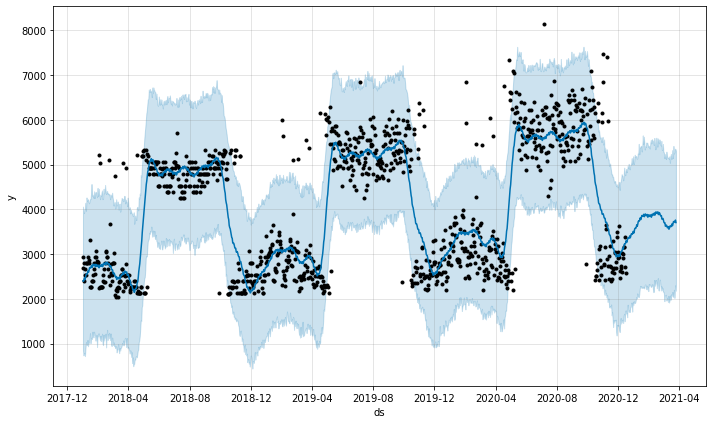

In [11]:
plot1 = m.plot(forecast)

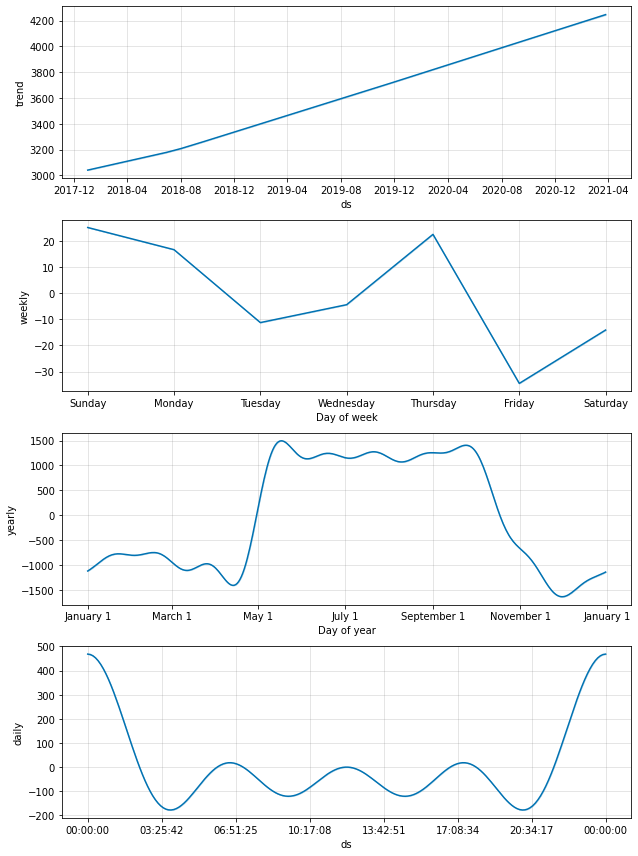

In [12]:
plt2 = m.plot_components(forecast)